# 查找历史金叉死叉日期

- 使用tushare包过去某股票的历史行情数据

- 使用pandas包计算该股票历史数据的5日均线和30日均线

- 使用matplotlib包可视化历史数据的收盘价和两条均线

- 分析输出所有金叉日期和死叉日期

- 如果我从2012年1月1日开始，初始资金为100000元，金叉尽量买入，死叉全部卖出，则到今天为止，我的炒股收益率如何？

In [1]:
import tushare as ts
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt

### 使用tushare包过去某股票的历史行情数据

In [2]:
pro = ts.pro_api()
df = pro.daily(ts_code='600519.SH', start_date='20120101') # 茅台从20120101开始的股价信息
df.to_csv("600519SH.csv")
df

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,600519.SH,20210909,1626.00,1645.00,1624.01,1634.08,1633.10,0.98,0.0600,19950.13,3257785.762
1,600519.SH,20210908,1660.00,1671.18,1628.08,1633.10,1669.00,-35.90,-2.1510,33063.67,5428265.636
2,600519.SH,20210907,1661.03,1684.48,1651.00,1669.00,1670.67,-1.67,-0.1000,31211.22,5204051.657
3,600519.SH,20210906,1649.00,1708.16,1626.15,1670.67,1658.22,12.45,0.7508,55338.06,9306030.671
4,600519.SH,20210903,1610.02,1659.79,1582.00,1658.22,1618.80,39.42,2.4351,52835.18,8631165.696
...,...,...,...,...,...,...,...,...,...,...,...
2349,600519.SH,20120110,187.00,194.66,186.11,194.48,188.01,6.47,3.4400,39235.60,749263.279
2350,600519.SH,20120109,186.00,188.09,181.77,188.01,186.64,1.37,0.7300,26160.16,483282.452
2351,600519.SH,20120106,183.10,188.05,181.65,186.64,183.15,3.49,1.9100,25190.62,464647.453
2352,600519.SH,20120105,184.00,185.20,182.36,183.15,185.27,-2.12,-1.1400,30122.64,553347.012


In [3]:
df = pd.read_csv("600519SH.csv", index_col='trade_date', parse_dates=['trade_date'])[['open','close','high','low']]
df = df.iloc[::-1]
df

,open,close,high,low
trade_date,,,,
2012-01-04,191.50,185.27,192.77,185.00
2012-01-05,184.00,183.15,185.20,182.36
2012-01-06,183.10,186.64,188.05,181.65
2012-01-09,186.00,188.01,188.09,181.77
2012-01-10,187.00,194.48,194.66,186.11
...,...,...,...,...
2021-09-03,1610.02,1658.22,1659.79,1582.00
2021-09-06,1649.00,1670.67,1708.16,1626.15
2021-09-07,1661.03,1669.00,1684.48,1651.00


### 使用pandas包计算该股票历史数据的5日均线和30日均线

一般方法：使用循环

In [4]:
df['ma5'] = np.nan
df['ma30'] = np.nan # 创建两个空列，且全部为NaN

# 由于前四行无法凑够5个求平均，因此从第5个开始
for i in range(4, len(df)):
    df.loc[df.index[i], 'ma5'] = df['close'][i-4:i+1].mean()
    
for i in range(29, len(df)):
    df.loc[df.index[i], 'ma30'] = df['close'][i-29:i+1].mean()
    
df

,open,close,high,low,ma5,ma30
trade_date,,,,,,
2012-01-04,191.50,185.27,192.77,185.00,NaN,NaN
2012-01-05,184.00,183.15,185.20,182.36,NaN,NaN
2012-01-06,183.10,186.64,188.05,181.65,NaN,NaN
2012-01-09,186.00,188.01,188.09,181.77,NaN,NaN
2012-01-10,187.00,194.48,194.66,186.11,187.510,NaN
...,...,...,...,...,...,...
2021-09-03,1610.02,1658.22,1659.79,1582.00,1608.606,1672.098000
2021-09-06,1649.00,1670.67,1708.16,1626.15,1625.540,1667.650000
2021-09-07,1661.03,1669.00,1684.48,1651.00,1647.740,1666.187000


简介方法：使用rolling（）方法

In [5]:
df['ma5'] = df['close'].rolling(5).mean() # close中每5个滚动一次求平均
df['ma30'] = df['close'].rolling(30).mean() # close中每30个滚动一次求平均
df

,open,close,high,low,ma5,ma30
trade_date,,,,,,
2012-01-04,191.50,185.27,192.77,185.00,NaN,NaN
2012-01-05,184.00,183.15,185.20,182.36,NaN,NaN
2012-01-06,183.10,186.64,188.05,181.65,NaN,NaN
2012-01-09,186.00,188.01,188.09,181.77,NaN,NaN
2012-01-10,187.00,194.48,194.66,186.11,187.510,NaN
...,...,...,...,...,...,...
2021-09-03,1610.02,1658.22,1659.79,1582.00,1608.606,1672.098000
2021-09-06,1649.00,1670.67,1708.16,1626.15,1625.540,1667.650000
2021-09-07,1661.03,1669.00,1684.48,1651.00,1647.740,1666.187000


### 使用matplotlib包可视化历史数据的收盘价和两条均线

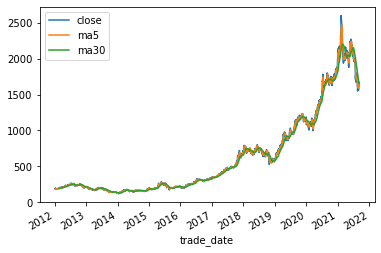

In [5]:
df[['close','ma5','ma30']].plot()
plt.show()

### 分析输出所有金叉日期和死叉日期

写法一：for循环

In [26]:
df = df.dropna()

golden_cross = []
dead_cross = []

for i in range(1, len(df)): # 因为会出现i和i+1比或者i和i-1比较，因此range从1开始
    if df['ma5'][i]>=df['ma30'][i] and df['ma5'][i-1]<df['ma30'][i-1]:
        golden_cross.append(df.index[i].to_pydatetime())
    if df['ma5'][i]<=df['ma30'][i] and df['ma5'][i-1]>df['ma30'][i-1]:
        dead_cross.append(df.index[i].to_pydatetime())
        
print(golden_cross)
print("------------------------")
print(dead_cross)


[datetime.datetime(2012, 7, 27, 0, 0), datetime.datetime(2012, 8, 9, 0, 0), datetime.datetime(2012, 9, 12, 0, 0), datetime.datetime(2012, 9, 27, 0, 0), datetime.datetime(2012, 12, 21, 0, 0), datetime.datetime(2013, 1, 10, 0, 0), datetime.datetime(2013, 3, 12, 0, 0), datetime.datetime(2013, 4, 17, 0, 0), datetime.datetime(2013, 7, 5, 0, 0), datetime.datetime(2013, 10, 22, 0, 0), datetime.datetime(2013, 11, 11, 0, 0), datetime.datetime(2013, 11, 28, 0, 0), datetime.datetime(2014, 1, 23, 0, 0), datetime.datetime(2014, 4, 3, 0, 0), datetime.datetime(2014, 6, 23, 0, 0), datetime.datetime(2014, 7, 17, 0, 0), datetime.datetime(2014, 9, 4, 0, 0), datetime.datetime(2014, 9, 29, 0, 0), datetime.datetime(2014, 11, 20, 0, 0), datetime.datetime(2014, 11, 28, 0, 0), datetime.datetime(2015, 2, 13, 0, 0), datetime.datetime(2015, 7, 15, 0, 0), datetime.datetime(2015, 9, 16, 0, 0), datetime.datetime(2015, 10, 9, 0, 0), datetime.datetime(2015, 12, 3, 0, 0), datetime.datetime(2015, 12, 21, 0, 0), datetime

写法二：布尔值+错位判断

In [24]:
df = df.dropna()

sr1 = df['ma5'] <= df['ma30']
sr2 = df['ma5'] >= df['ma30']

'''
从sr1可知当F转T时为死叉，T转F时为金叉；且sr2的结果与sr1的结果恰好相反
sr1 = FFFFTTTTTTTFFF
sr2 = TTTTFFFFFFFTTT
而通过使sr2向右移动一格，可得：
sr1 = FFFFTTTTTTTFFF
sr2 =  TTTTFFFFFFFTTT
由此可观当两者相等且为T时为死叉，两者相等且为F时为金叉

'''

dead_cross = df[sr1 & sr2.shift(1)].index
golden_cross = df[-(sr1 | sr2.shift(1))].index

print(golden_cross)
print("------------------------")
print(dead_cross)

DatetimeIndex(['2012-02-21', '2012-07-27', '2012-08-09', '2012-09-12',
               '2012-09-27', '2012-12-21', '2013-01-10', '2013-03-12',
               '2013-04-17', '2013-07-05', '2013-10-22', '2013-11-11',
               '2013-11-28', '2014-01-23', '2014-04-03', '2014-06-23',
               '2014-07-17', '2014-09-04', '2014-09-29', '2014-11-20',
               '2014-11-28', '2015-02-13', '2015-07-15', '2015-09-16',
               '2015-10-09', '2015-12-03', '2015-12-21', '2016-02-22',
               '2016-08-11', '2016-10-13', '2016-11-25', '2017-07-24',
               '2017-09-18', '2017-12-15', '2018-03-16', '2018-05-09',
               '2018-07-25', '2018-09-20', '2018-12-04', '2019-01-03',
               '2019-06-14', '2019-08-13', '2020-01-02', '2020-02-19',
               '2020-03-03', '2020-04-02', '2020-08-19', '2020-10-14',
               '2020-11-05', '2021-04-02', '2021-04-16', '2021-05-20'],
              dtype='datetime64[ns]', name='trade_date', freq=None)
--------

### 如果我从2012年1月1日开始，初始资金为100000元，金叉尽量买入，死叉全部卖出，则到今天为止，我的炒股收益率如何？

对于方法一，index在列表中

In [27]:
base_money = 100000
hold = 0 # 所持有的股数
cost_money = 0

for i in range(0, len(df)):
    if df.index[i] in golden_cross:
        buy = base_money//(100 * df.iloc[i]['open'])
        hold += buy*100 # 一手等于100股
        base_money -= hold * df.iloc[i]['open']
    elif df.index[i] in dead_cross:
        base_money += hold * df.iloc[i]['open']
        hold = 0

all_money = base_money + hold * df.iloc[-1]['open']
print(hold)
print(str((all_money/100000)*100) + "%")


        

0
771.581%


对于方法二，利用布尔值错位

In [25]:
base_money = 100000
hold = 0 # 持有多少股
sr1 = pd.Series(1, index=golden_cross)
sr2 = pd.Series(0, index=dead_cross)
sr = sr1.append(sr2).sort_index()
for i in range(0, len(sr)):
    p = df['open'][sr.index[i]]
    if sr.iloc[i] == 1:
        # 金叉
        buy = base_money//(100 * p) # 买了多少手
        hold += buy*100 # 一手等于100股
        base_money -= buy * 100 * p
    else:
        # 死叉
        base_money += hold * p
        hold = 0
        
all_money = base_money + hold * df.iloc[-1]['open']   

print(str((all_money/100000)*100) + "%")

1008628.0
0
1008.628%


由于上一步骤的方法一和方法二的区别，造成方法二的golden_cros多一个值（2012-02-21），因为在比较该日时，MA30为NaN

In [6]:
df.loc['2012-02-16':'2012-02-23']

,open,close,high,low,ma5,ma30
trade_date,,,,,,
2012-02-16,193.52,191.72,194.80,190.60,192.854,NaN
2012-02-17,193.88,191.44,193.88,190.37,193.040,NaN
2012-02-20,192.96,190.86,193.67,190.80,192.528,NaN
2012-02-21,191.79,191.95,192.58,190.40,192.154,187.646667
2012-02-22,192.76,192.76,193.50,190.98,191.746,187.896333
2012-02-23,192.52,194.31,195.04,192.52,192.264,188.268333


In [10]:
df = df.dropna()

sr1 = df['ma5'] <= df['ma30']
sr2 = df['ma5'] >= df['ma30']
df['ma30'].shift(1)

trade_date
2012-02-21            NaN
2012-02-22     187.646667
2012-02-23     187.896333
2012-02-24     188.268333
2012-02-27     188.649667
                 ...     
2021-09-03    1680.157333
2021-09-06    1672.098000
2021-09-07    1667.650000
2021-09-08    1666.187000
2021-09-09    1661.660333
Name: ma30, Length: 2325, dtype: float64

In [9]:
df[-(sr1 | sr2.shift(1))].index

DatetimeIndex(['2012-02-21', '2012-07-27', '2012-08-09', '2012-09-12',
               '2012-09-27', '2012-12-21', '2013-01-10', '2013-03-12',
               '2013-04-17', '2013-07-05', '2013-10-22', '2013-11-11',
               '2013-11-28', '2014-01-23', '2014-04-03', '2014-06-23',
               '2014-07-17', '2014-09-04', '2014-09-29', '2014-11-20',
               '2014-11-28', '2015-02-13', '2015-07-15', '2015-09-16',
               '2015-10-09', '2015-12-03', '2015-12-21', '2016-02-22',
               '2016-08-11', '2016-10-13', '2016-11-25', '2017-07-24',
               '2017-09-18', '2017-12-15', '2018-03-16', '2018-05-09',
               '2018-07-25', '2018-09-20', '2018-12-04', '2019-01-03',
               '2019-06-14', '2019-08-13', '2020-01-02', '2020-02-19',
               '2020-03-03', '2020-04-02', '2020-08-19', '2020-10-14',
               '2020-11-05', '2021-04-02', '2021-04-16', '2021-05-20'],
              dtype='datetime64[ns]', name='trade_date', freq=None)